In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [17]:
df = pd.read_csv(r"C:\Users\Joshua.Mahada\Downloads\MediaInvestment.csv")
df.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.1,0.2,2.5,7.4,0.0,1.3,0.5,5.0,NaN,NaN
1,2015,8,5.1,0.0,1.3,1.1,0.0,0.1,0.1,2.5,NaN,NaN
2,2015,9,96.3,3.9,1.4,62.8,0.6,16.4,5.0,6.2,NaN,NaN
3,2015,10,170.2,6.1,12.6,84.7,3.4,24.4,7.0,31.9,NaN,NaN
4,2015,11,51.2,4.2,1.3,14.2,0.2,19.6,6.6,5.2,NaN,NaN


In [18]:
df.shape

(12, 12)

In [19]:
# Clean column names
df.columns = df.columns.str.strip()

# Convert Year and Month into a proper date format
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

# Drop Year and Month since we now have a date column
df = df.drop(columns=['Year', 'Month'])

# Drop 'Radio' and 'Other' columns due to high missing values
df = df.drop(columns=['Radio', 'Other'])

# Display dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Total Investment   12 non-null     float64       
 1   TV                 12 non-null     float64       
 2   Digital            12 non-null     float64       
 3   Sponsorship        12 non-null     float64       
 4   Content Marketing  12 non-null     float64       
 5   Online marketing   12 non-null     float64       
 6   Affiliates         12 non-null     float64       
 7   SEM                12 non-null     float64       
 8   Date               12 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(8)
memory usage: 996.0 bytes


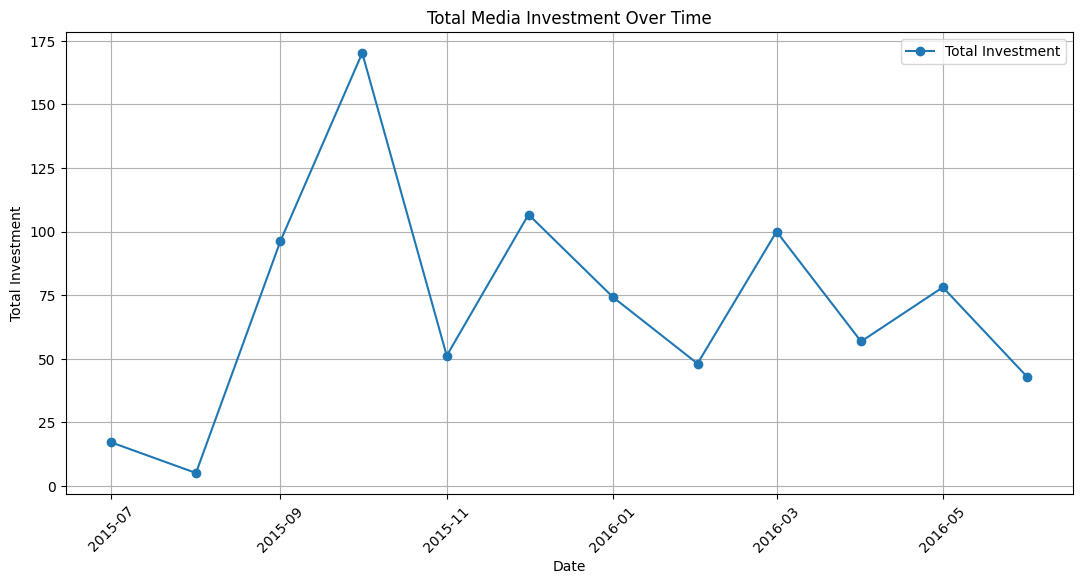

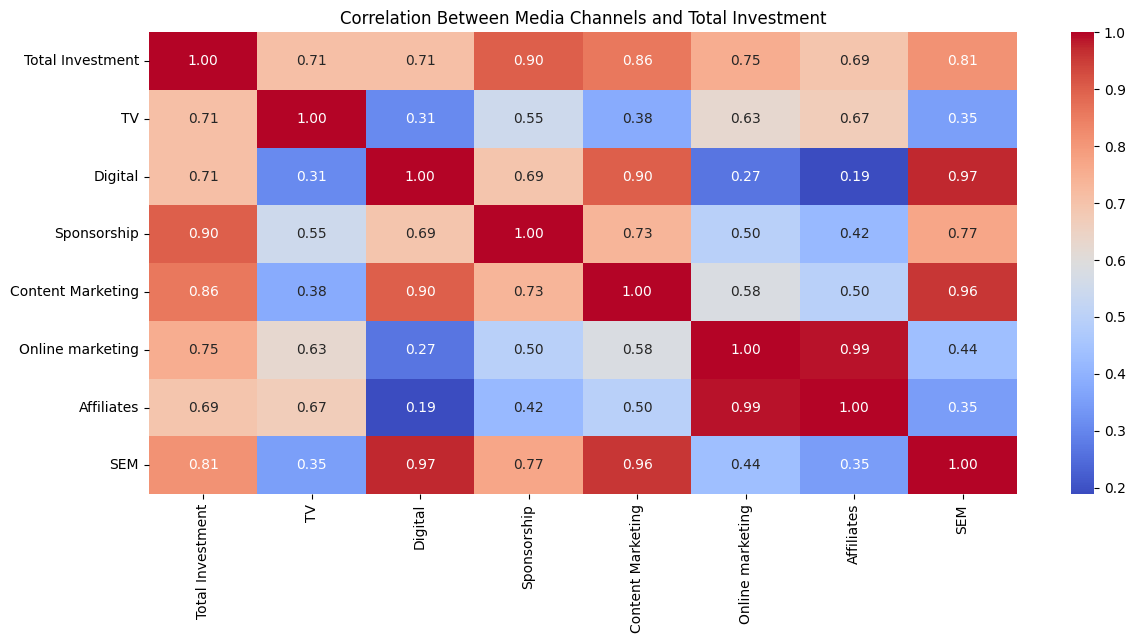

In [20]:
# Plot Total Investment Over Time
plt.figure(figsize=(13, 6))
plt.plot(df['Date'], df['Total Investment'], marker='o', linestyle='-', label='Total Investment')
plt.title('Total Media Investment Over Time')
plt.xlabel('Date')
plt.ylabel('Total Investment')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(df.drop(columns=['Date']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Media Channels and Total Investment')
plt.show()


In [21]:
# Define Adstock transformation function
def adstock(series, decay=0.5):
    adstocked_series = np.zeros_like(series)
    for i in range(1, len(series)):
        adstocked_series[i] = series[i] + decay * adstocked_series[i - 1]
    return adstocked_series

# Apply Adstock transformation to media columns
media_columns = df.columns.difference(['Total Investment', 'Date'])
for col in media_columns:
    df[f'{col}_adstock'] = adstock(df[col], decay=0.5)

# Display updated dataset
df.head()


,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Date,Affiliates_adstock,Content Marketing_adstock,Digital_adstock,Online marketing_adstock,SEM_adstock,Sponsorship_adstock,TV_adstock
0,17.1,0.2,2.5,7.4,0.0,1.3,0.5,5.0,2015-07-01,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.000
1,5.1,0.0,1.3,1.1,0.0,0.1,0.1,2.5,2015-08-01,0.1000,0.00,1.3000,0.1000,2.5000,1.1000,0.000
2,96.3,3.9,1.4,62.8,0.6,16.4,5.0,6.2,2015-09-01,5.0500,0.60,2.0500,16.4500,7.4500,63.3500,3.900
3,170.2,6.1,12.6,84.7,3.4,24.4,7.0,31.9,2015-10-01,9.5250,3.70,13.6250,32.6250,35.6250,116.3750,8.050
4,51.2,4.2,1.3,14.2,0.2,19.6,6.6,5.2,2015-11-01,11.3625,2.05,8.1125,35.9125,23.0125,72.3875,8.225


In [22]:
# Apply log transformation for diminishing returns
for col in media_columns:
    df[f'{col}_log'] = np.log1p(df[f'{col}_adstock'])

# Display transformed dataset
df.head()


,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Date,Affiliates_adstock,...,SEM_adstock,Sponsorship_adstock,TV_adstock,Affiliates_log,Content Marketing_log,Digital_log,Online marketing_log,SEM_log,Sponsorship_log,TV_log
0,17.1,0.2,2.5,7.4,0.0,1.3,0.5,5.0,2015-07-01,0.0000,...,0.0000,0.0000,0.000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
1,5.1,0.0,1.3,1.1,0.0,0.1,0.1,2.5,2015-08-01,0.1000,...,2.5000,1.1000,0.000,0.095310,0.000000,0.832909,0.09531,1.252763,0.741937,0.000000
2,96.3,3.9,1.4,62.8,0.6,16.4,5.0,6.2,2015-09-01,5.0500,...,7.4500,63.3500,3.900,1.800058,0.470004,1.115142,2.85934,2.134166,4.164337,1.589235
3,170.2,6.1,12.6,84.7,3.4,24.4,7.0,31.9,2015-10-01,9.5250,...,35.6250,116.3750,8.050,2.353753,1.547563,2.682732,3.51527,3.600731,4.765374,2.202765
4,51.2,4.2,1.3,14.2,0.2,19.6,6.6,5.2,2015-11-01,11.3625,...,23.0125,72.3875,8.225,2.514668,1.115142,2.209647,3.60855,3.178575,4.295754,2.221917


In [23]:
# Define predictors (adstock + log-transformed media channels)
predictors = [col for col in df.columns if '_log' in col]
X = df[predictors]
y = df['Total Investment']

# Standardize predictors
X_standardized = (X - X.mean()) / X.std()

# Add a constant term for intercept
X_with_const = sm.add_constant(X_standardized)

# Fit an OLS regression model
ols_model = sm.OLS(y, X_with_const).fit()

# Display model summary
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:       Total Investment   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     5.523
Date:                Mon, 17 Mar 2025   Prob (F-statistic):             0.0590
Time:                        11:31:57   Log-Likelihood:                -47.858
No. Observations:                  12   AIC:                             111.7
Df Residuals:                       4   BIC:                             115.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    70.55

C:\Users\Joshua.Mahada\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [26]:
# Function to predict Total Investment given a new budget allocation
def predict_investment(new_budget_allocation):
    # Convert to DataFrame
    new_data = pd.DataFrame([new_budget_allocation], columns=predictors)
    
    # Standardize using previous mean & std
    new_data_standardized = (new_data - X.mean()) / X.std()
    
    # Add constant term to match the trained model
    new_data_with_const = sm.add_constant(new_data_standardized)

    # Ensure the columns match the trained model
    missing_cols = set(X_with_const.columns) - set(new_data_with_const.columns)
    for col in missing_cols:
        new_data_with_const[col] = 1  # Add missing constant term if needed

    # Reorder columns to match model training
    new_data_with_const = new_data_with_const[X_with_const.columns]

    # Predict Total Investment
    return ols_model.predict(new_data_with_const)[0]

# Example: Adjust Digital & TV Budget
new_budget = {
    'TV_log': np.log1p(10),
    'Digital_log': np.log1p(15),
    'Sponsorship_log': np.log1p(5),
    'Content Marketing_log': np.log1p(3),
    'Online marketing_log': np.log1p(7),
    'Affiliates_log': np.log1p(2),
    'SEM_log': np.log1p(8)
}

# Predict investment with the new budget allocation
predicted_investment = predict_investment(new_budget)
print(f"Predicted Total Investment with new budget: {predicted_investment:.2f}")



Predicted Total Investment with new budget: 60.61


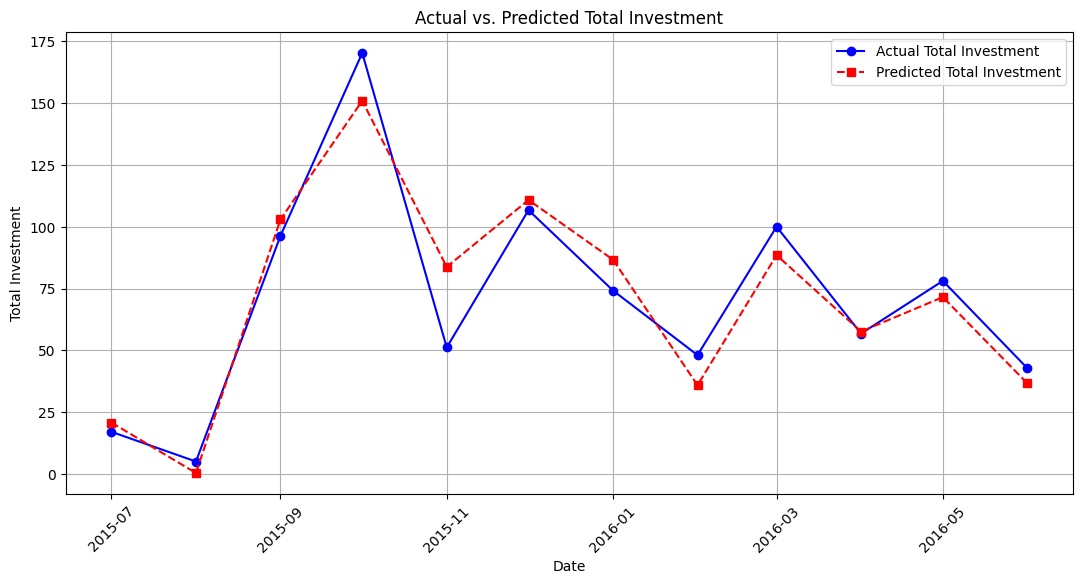

In [28]:
# Predict Total Investment using the model for the entire dataset
df['Predicted_Investment'] = ols_model.predict(X_with_const)

# Plot Actual vs. Predicted Total Investment
plt.figure(figsize=(13, 6))
plt.plot(df['Date'], df['Total Investment'], marker='o', linestyle='-', label="Actual Total Investment", color='blue')
plt.plot(df['Date'], df['Predicted_Investment'], marker='s', linestyle='--', label="Predicted Total Investment", color='red')

# Formatting
plt.title("Actual vs. Predicted Total Investment")
plt.xlabel("Date")
plt.ylabel("Total Investment")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()
